<a href="https://colab.research.google.com/github/GigasTaufan/tubes-dti/blob/master/Data_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [80]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [81]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Oversampling

In [144]:
count_class_Y, count_class_N = df.Loan_Status.value_counts()

In [145]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [146]:
count_class_Y

422

In [147]:
count_class_N

192

In [148]:
data_class_Y = df[df['Loan_Status'] == 'Y']
data_class_N = df[df['Loan_Status'] == 'N']

In [149]:
data_class_Y

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [150]:
data_class_N

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [151]:
data_class_N_over = data_class_N.sample(count_class_Y, replace=True)
data_test_over = pd.concat([data_class_Y, data_class_N_over], axis=0)

print('Random over-sampling:')
print(data_test_over.Loan_Status.value_counts())

Random over-sampling:
Y    422
N    422
Name: Loan_Status, dtype: int64


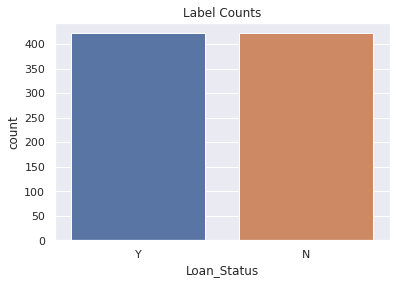

In [152]:
fig3 = sns.countplot(x= 'Loan_Status',data = data_test_over)
plt.title('Label Counts')
plot = fig3.get_figure()

# Cleansing

In [153]:
data_test_over.isnull().sum()

Loan_ID               0
Gender               14
Married               3
Dependents           30
Education             0
Self_Employed        40
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           36
Loan_Amount_Term     24
Credit_History       73
Property_Area         0
Loan_Status           0
dtype: int64

In [154]:
data_test_over

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,LP001586,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,N
148,LP001519,Female,No,0,Graduate,No,10000,1666.0,225.0,360.0,1.0,Rural,N
140,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
410,LP002318,Female,No,1,Not Graduate,Yes,3867,0.0,62.0,360.0,1.0,Semiurban,N


In [155]:
data_test_over['Dependents'] = data_test_over['Dependents'].fillna(data_test_over['Dependents'].mode()[0])
data_test_over['Married'] = data_test_over['Married'].fillna(data_test_over['Married'].mode()[0])
data_test_over['Self_Employed'] = data_test_over['Self_Employed'].fillna(data_test_over['Self_Employed'].mode()[0])
data_test_over['Gender'] = data_test_over['Gender'].fillna(data_test_over['Gender'].mode()[0])
data_test_over['Credit_History'] = data_test_over['Credit_History'].fillna(data_test_over['Credit_History'].mode()[0])

In [156]:
data_test_over ['LoanAmount'] = data_test_over['LoanAmount'].replace(np.NaN , data_test_over['LoanAmount'].mean())
data_test_over ['Loan_Amount_Term'] = data_test_over['Loan_Amount_Term'].replace(np.NaN , data_test_over['Loan_Amount_Term'].mean())

In [157]:
g=data_test_over.groupby('Property_Area')['Property_Area']

g.count()

Property_Area
Rural        259
Semiurban    295
Urban        290
Name: Property_Area, dtype: int64

In [158]:
f=data_test_over.groupby('Dependents')['Dependents']

f.count()

Dependents
0     486
1     150
2     128
3+     80
Name: Dependents, dtype: int64

In [159]:
data_test_over['Gender'] = data_test_over['Gender'].map({'Male':1, 'Female':0})
data_test_over['Self_Employed'] = data_test_over['Self_Employed'].map({'Yes':1, 'No':0})
data_test_over['Education'] = data_test_over['Education'].map({'Graduate':1, 'Not Graduate':0})
data_test_over['Loan_Status'] = data_test_over['Loan_Status'].map({'Y':1, 'N':0})
data_test_over['Married'] = data_test_over['Married'].map({'No':1, 'Yes':0})
data_test_over['Property_Area'] = data_test_over['Property_Area'].map({'Rural':1, 'Semiurban':0,'Urban':2})
data_test_over['Dependents'] = data_test_over['Dependents'].map({'1':1, '0':0,'2':2,'3+':3})
# data_test_over['Loan_Amount_Term'] = data_test_over['Loan_Amount_Term'].map({'1':1, '0':0,'2':2,'3+':3})

In [160]:
data_test_over.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Correlation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd058258860>,
      dtype=object)

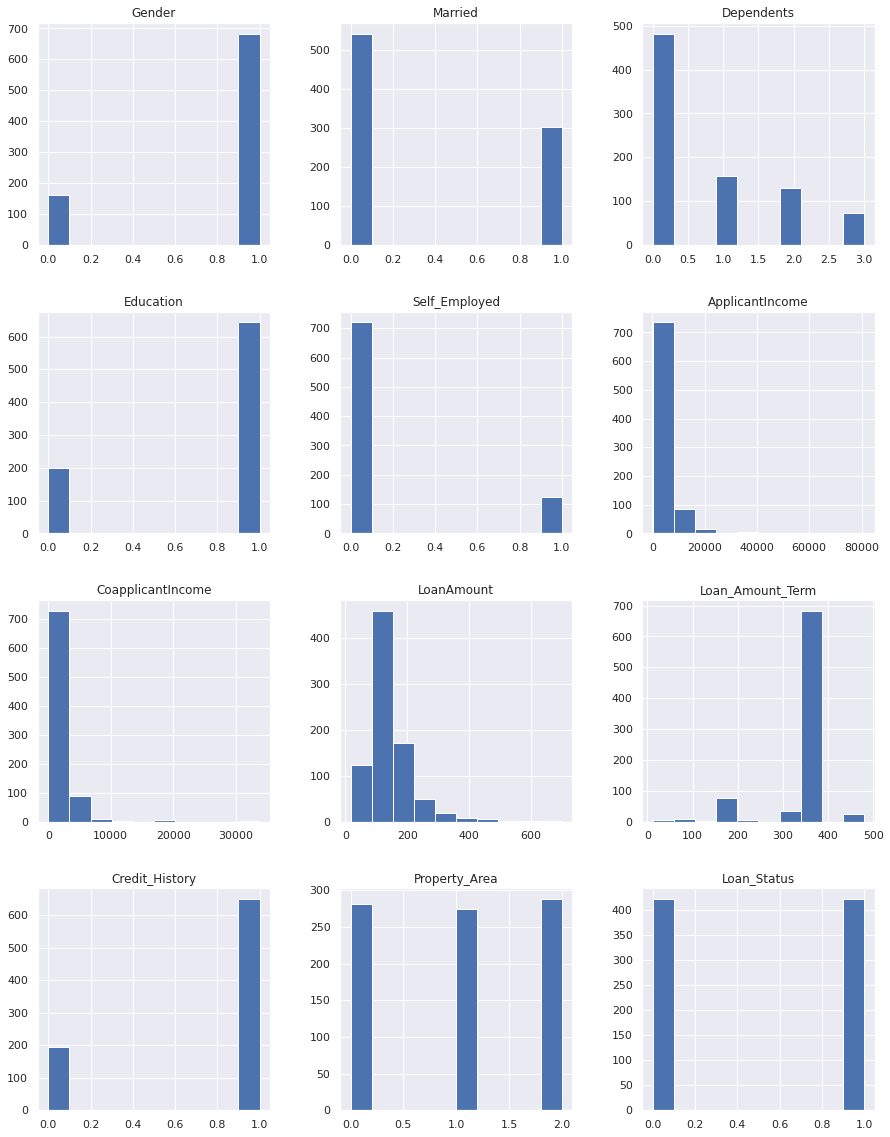

In [133]:
# data.hist()

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data_test_over.hist(ax = ax)

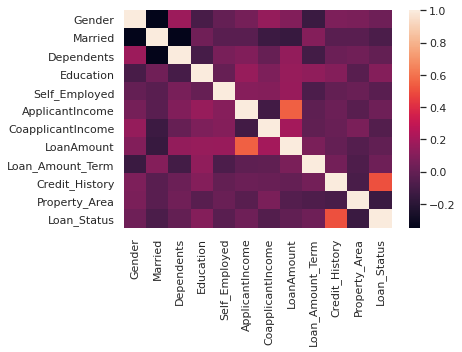

In [134]:
sns.heatmap(data_test_over.corr());

In [135]:
data_test_over.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.348462,0.173440,-0.093270,0.003959,0.057111,0.153573,0.098421,-0.139278,0.078790,0.071017,0.033172
Married,-0.348462,1.000000,-0.337986,0.038155,-0.035109,-0.035969,-0.133996,-0.151534,0.103364,-0.032798,-0.034635,-0.084038
Dependents,0.173440,-0.337986,1.000000,-0.098483,0.062967,0.090534,0.005205,0.149921,-0.106987,0.024840,0.041145,-0.005885
Education,-0.093270,0.038155,-0.098483,1.000000,0.009057,0.157238,0.080675,0.160475,0.139792,0.099527,-0.038489,0.100310
Self_Employed,0.003959,-0.035109,0.062967,0.009057,1.000000,0.108684,0.101071,0.164370,-0.078752,-0.005806,0.016277,-0.036938
ApplicantIncome,0.057111,-0.035969,0.090534,0.157238,0.108684,1.000000,-0.112420,0.551855,-0.018971,0.021132,-0.042347,0.035235
CoapplicantIncome,0.153573,-0.133996,0.005205,0.080675,0.101071,-0.112420,1.000000,0.200734,-0.011398,0.013142,0.069408,-0.058707
LoanAmount,0.098421,-0.151534,0.149921,0.160475,0.164370,0.551855,0.200734,1.000000,0.070089,0.001506,-0.050391,-0.010339
Loan_Amount_Term,-0.139278,0.103364,-0.106987,0.139792,-0.078752,-0.018971,-0.011398,0.070089,1.000000,0.051384,-0.070506,0.034779
Credit_History,0.078790,-0.032798,0.024840,0.099527,-0.005806,0.021132,0.013142,0.001506,0.051384,1.000000,-0.087088,0.506891


In [162]:
data_test_over.drop(['Loan_ID','Dependents','Self_Employed'], axis=1, inplace=True)

In [137]:
data_test_over.to_csv('prediksi_data.csv', index=False)

In [163]:
x = data_test_over.drop(["Loan_Status"], axis = 1)
y = data_test_over["Loan_Status"]

# Naive

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [165]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [166]:
y_pred = nbtrain.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[49, 31],
       [ 7, 82]])

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72        80
           1       0.73      0.92      0.81        89

    accuracy                           0.78       169
   macro avg       0.80      0.77      0.77       169
weighted avg       0.80      0.78      0.77       169

